# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

In [598]:
# Importing the required packages here
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno

from datetime import datetime
import matplotlib.pyplot as plt
#% matplotlib inline

### Load automobile dataset

In [599]:
automobile_data = pd.read_csv("automobile.txt", encoding='unicode_escape')

In [600]:
automobile_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [601]:
automobile_data.tail(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Data Cleaning
###### Replace "?" with NaN values

In [602]:
automobile_data = automobile_data.replace('?', np.NaN)

In [603]:
automobile_data.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [604]:
# Checking automobile data info
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [605]:
automobile_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, and price have missing data points

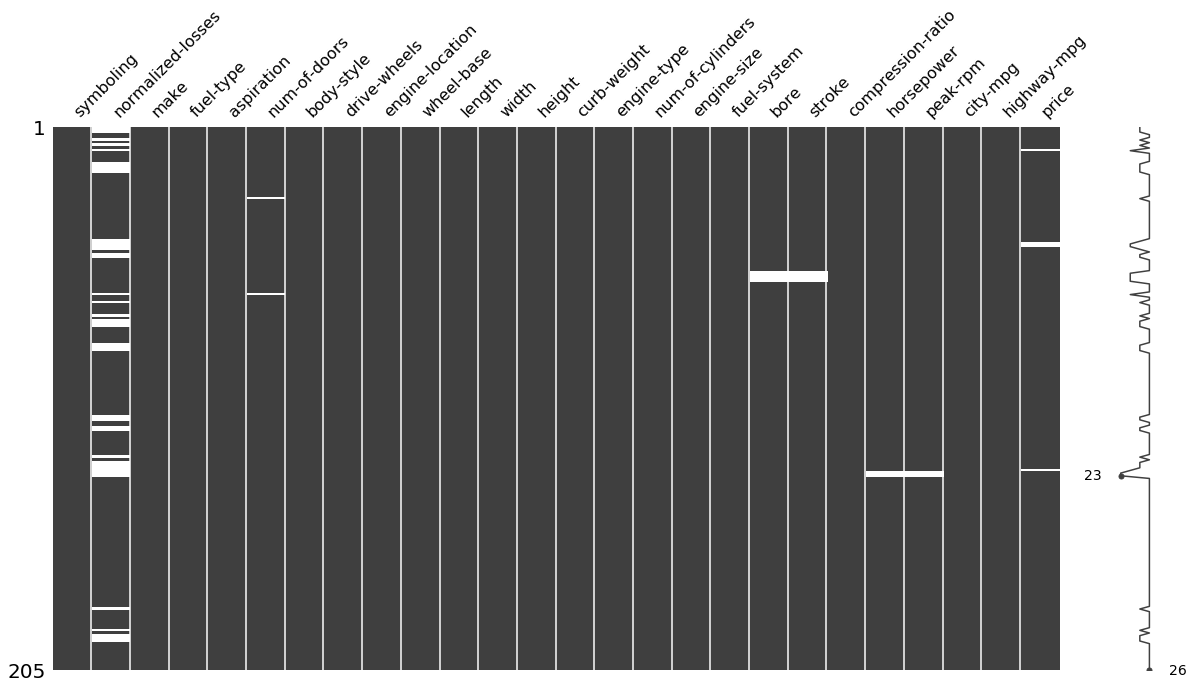

In [606]:
### Plot graphic of missing values

missingno.matrix(automobile_data, figsize = (20,10) )

   #### For more clear vision, we can also visualize missing data points using heat map

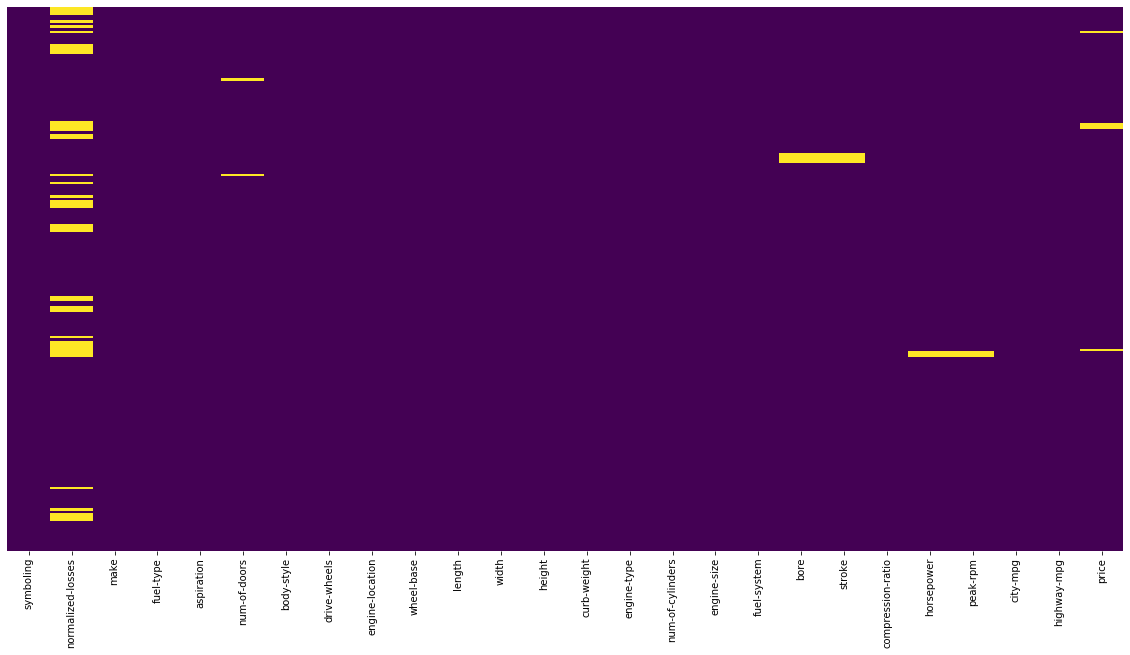

In [607]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(automobile_data.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

In [608]:
automobile_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# Solving missing data
### (1)  num of doors

#### we will start by checking car body style

In [609]:
vehicle_type = automobile_data.groupby(['num-of-doors', 'body-style']).size()
vehicle_type

num-of-doors  body-style 
four          hatchback      10
              sedan          79
              wagon          25
two           convertible     6
              hardtop         8
              hatchback      60
              sedan          15
dtype: int64

by looking at vehicle body style, we can see that most hatchback are two_doors, sedan: four_doors. Therefore we can classify them as: 
// // 
two_doors -> {convertile, hardtop} // //
four_doors -> {hatchback, sedan, wagon}
            

In [610]:
four_doors = ['sedan', 'wagon', 'hatchback']
for num_d in automobile_data['body-style']:
    if num_d in four_doors:
        automobile_data['num_of_doors'] = automobile_data['num-of-doors'].replace(np.nan, 'four')
    else:
        automobile_data['num-of-doors'] = automobile_data['num-of-doors'].replace(np.nan, 'two')

In [611]:
# check if num of doors has been replace!
automobile_data['num-of-doors'].isnull().sum()

0

### (2)  bore and stroke

#### For bore and stroke missing data points we will use the mean to replace the missing data points

In [612]:
def data_mean(col):
    data_mean = automobile_data[automobile_data[col] != np.nan][col].astype(float).mean()
    return (data_mean)

In [613]:
col = ['bore', 'stroke', 'price', 'horsepower', 'peak-rpm', 'normalized-losses']
for i in col:
    automobile_data[i] = automobile_data[i].replace(np.nan, data_mean(i))


In [614]:
#check
automobile_data['normalized-losses']

0      122
1      122
2      122
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [615]:
automobile_data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
num_of_doors         0
dtype: int64

### Now data we have cleaned our data, we can start with visualization plots:

# Data Visualisation
##### Now we can start doing some plots

#### Questions that we could try to answer:

##### 
    # Which is the most expensive car make?
    # How does the engine-size affect the price of a car?  
    # Body-style in relation to the number of doors
    # Which is the most popular make


### Processed data statistics

In [616]:
automobile_data_test = automobile_data
automobile_data_test.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


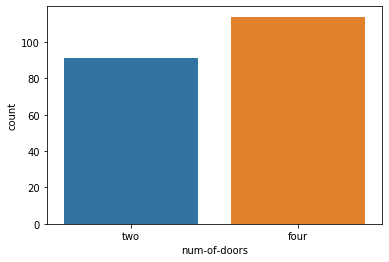

In [617]:
sns.countplot('num-of-doors', data=automobile_data_test)

#### From the above plot, we could clearly see that most cars have four doors

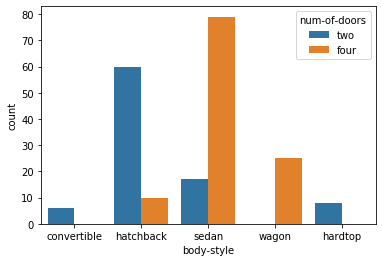

In [618]:
sns.countplot('body-style', data = automobile_data_test, hue = 'num-of-doors')

In [619]:
# This can also be shown using pie plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F40445608>],
      dtype=object)

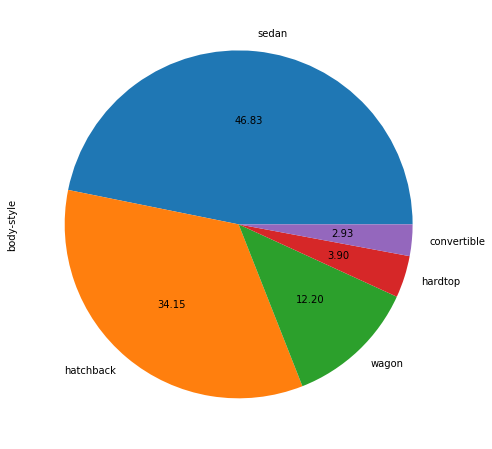

In [620]:
automobile_data_test['body-style'].value_counts().plot.pie(subplots=True,figsize=(8, 8), autopct='%.2f') #   figsize=(6, 6), autopct='%.2f')

In [621]:
# most hatchback are two-doors and most sedan are four-doors

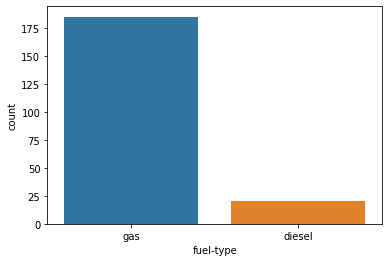

In [622]:
sns.countplot('fuel-type', data=automobile_data_test)

In [623]:
# most cars use gas

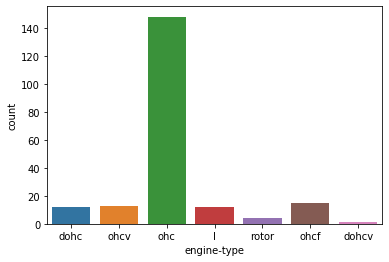

In [624]:
sns.countplot('engine-type', data=automobile_data_test)

In [625]:
# most type of engines are chc

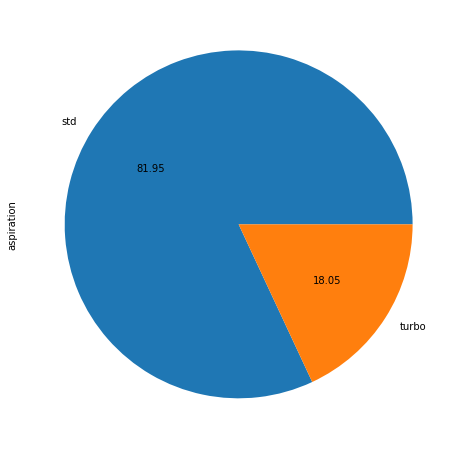

In [626]:
automobile_data_test['aspiration'].value_counts().plot.pie(figsize=(8, 8), autopct='%.2f')

The above pie chart shows that standard fuel type is the most preferred one compared to turbo, with 81.95% preferrence

In [627]:
# Converting price to float
automobile_data_test['price'] = automobile_data_test['price'].astype(float)

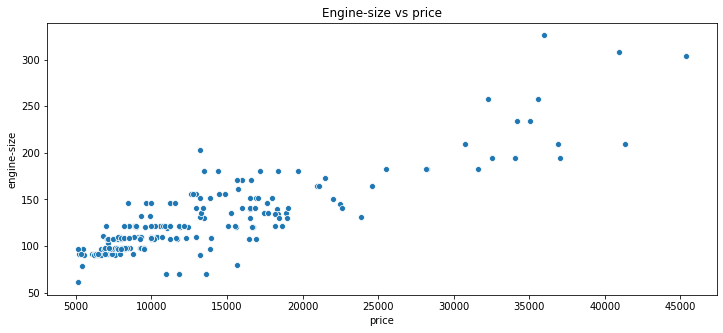

In [628]:
# scatter plot showing price vs engine size
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title("Engine-size vs price")
sns.scatterplot(automobile_data_test['price'], automobile_data_test['engine-size'], ax =ax)

From the above scatter plot we see that engine-size is directly proportional to the vehicle price

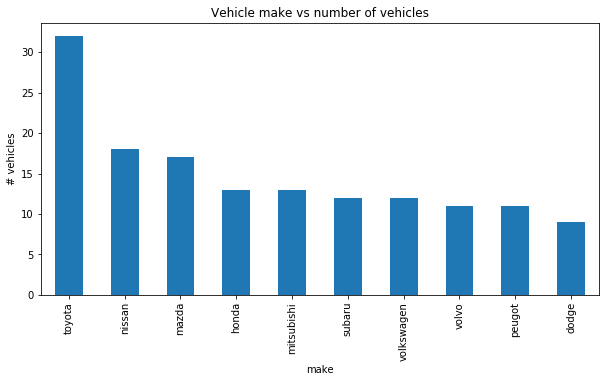

In [629]:
# Top 10 most vehicle making
automobile_data_test['make'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Vehicle make vs number of vehicles")
plt.ylabel("# vehicles")
plt.xlabel("make")
plt.show()

The above plot shows that toyota is the make which consist of most number of vehicles.

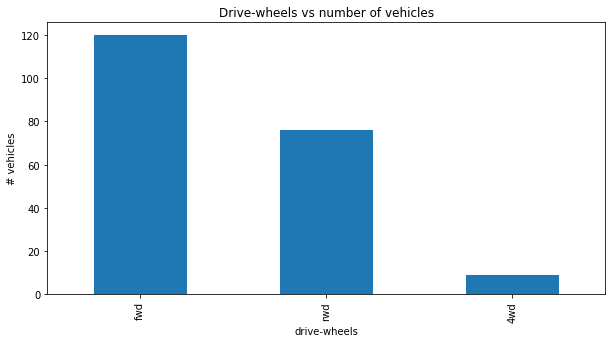

In [630]:
automobile_data_test['drive-wheels'].value_counts().plot(kind ='bar', figsize=(10,5))
plt.title("Drive-wheels vs number of vehicles")
plt.ylabel("# vehicles")
plt.xlabel("drive-wheels")
plt.show()

The above plot shows front wheels has most number of vehicles. 

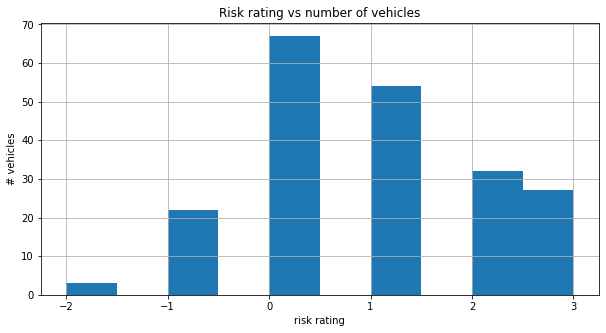

In [631]:
# Vehicle risks ratingsThe above plot shows front wheels has most number of vehicles. 
automobile_data_test['symboling'].hist(figsize=(10,5))
plt.title("Risk rating vs number of vehicles")
plt.ylabel("# vehicles")
plt.xlabel("risk rating")
plt.show()

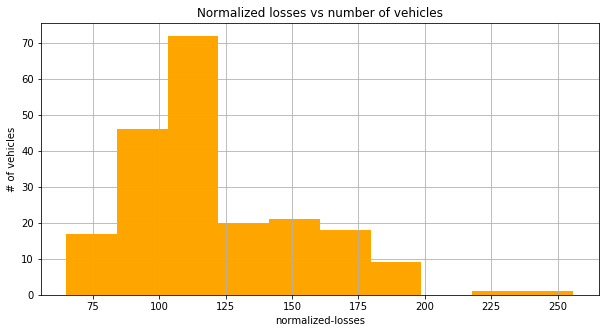

In [632]:
automobile_data_test['normalized-losses'].astype(np.int64).hist(figsize=(10,5), color='orange')
plt.title("Normalized losses vs number of vehicles")
plt.xlabel("normalized-losses")
plt.ylabel("# of vehicles")
plt.show()

The above plot shows that most normalized-losses lie between 80 - 120